#  Budget Vs Earnings

Import libraries required for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the CSV files and combine the two files.

In [2]:
df1 = pd.read_csv("./data/tngross.csv")
df2 = pd.read_csv("./data/tnproduction.csv")
movie_data = df1.merge(df2, on= "Unnamed: 0")

Review the data to find the data needed for analysis.

In [3]:
movie_data

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564",181 minutes,Action,Marvel Studios,United States
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",136 minutes,Adventure,Walt Disney Pictures,United States
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979",141 minutes,Action,Marvel Studios,United States
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817",136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523",156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0,90 minutes,Drama,None,United States
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0,None,Documentary,None,United States
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0,None,Horror,None,United States


Extract the columns needed for our analysis.

In [4]:
movie_cash_flow = movie_data[["movie","production_budget", "worldwide_gross","domestic_gross" ]]
movie_cash_flow

,movie,production_budget,worldwide_gross,domestic_gross
0,Avengers: Endgame,"$400,000,000","$2,797,800,564","$858,373,000"
1,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$1,045,713,802","$241,071,802"
2,Avengers: Age of Ultron,"$365,000,000","$1,395,316,979","$459,005,868"
3,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$2,064,615,817","$936,662,225"
4,Avengers: Infinity War,"$300,000,000","$2,044,540,523","$678,815,482"
...,...,...,...,...
6095,Closure,"$100,000",$0,$0
6096,Lunch Time Heroes,"$100,000",$0,$0
6097,Open Secret,"$100,000",$0,$0
6098,The Night Visitor,"$100,000",$0,$0


Prepare the data for analysis by removing the "$", and "," from "production_budget", "worldwide_gross",and "domestic_gross".

In [5]:
#Removing the $ and , from the DF to convert to into for analasys 
movie_cash_flow["worldwide_gross"] = movie_cash_flow["worldwide_gross"].str.replace('$', '')
movie_cash_flow["domestic_gross"] = movie_cash_flow["domestic_gross"].str.replace('$', '')
movie_cash_flow["production_budget"] = movie_cash_flow["production_budget"].str.replace('$', '')
movie_cash_flow["worldwide_gross"] = movie_cash_flow["worldwide_gross"].str.replace(',', '')
movie_cash_flow["domestic_gross"] = movie_cash_flow["domestic_gross"].str.replace(',', '')
movie_cash_flow["production_budget"] = movie_cash_flow["production_budget"].str.replace(',', '')
movie_cash_flow

C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/1529050890.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_cash_flow["worldwide_gross"] = movie_cash_flow["worldwide_gross"].str.replace('$', '')
C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/1529050890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow["worldwide_gross"] = movie_cash_flow["worldwide_gross"].str.replace('$', '')
C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/1529050890.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single chara

,movie,production_budget,worldwide_gross,domestic_gross
0,Avengers: Endgame,400000000,2797800564,858373000
1,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,241071802
2,Avengers: Age of Ultron,365000000,1395316979,459005868
3,Star Wars Ep. VII: The Force Awakens,306000000,2064615817,936662225
4,Avengers: Infinity War,300000000,2044540523,678815482
...,...,...,...,...
6095,Closure,100000,0,0
6096,Lunch Time Heroes,100000,0,0
6097,Open Secret,100000,0,0
6098,The Night Visitor,100000,0,0


Convert the data in "production_budget", "worldwide_gross",and "domestic_gross" to floats.

In [6]:
#Converting columns into floats
movie_cash_flow["production_budget"]= movie_cash_flow["production_budget"].astype(float)
movie_cash_flow["domestic_gross"]= movie_cash_flow["domestic_gross"].astype(float)
movie_cash_flow["worldwide_gross"]= movie_cash_flow["worldwide_gross"].astype(float)
movie_cash_flow

C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/2106541091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow["production_budget"]= movie_cash_flow["production_budget"].astype(float)
C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/2106541091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow["domestic_gross"]= movie_cash_flow["domestic_gross"].astype(float)
C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/2106541091.py:4: SettingWithCopyWarning: 
A value is trying to b

,movie,production_budget,worldwide_gross,domestic_gross
0,Avengers: Endgame,400000000.0,2.797801e+09,858373000.0
1,Pirates of the Caribbean: On Stranger Tides,379000000.0,1.045714e+09,241071802.0
2,Avengers: Age of Ultron,365000000.0,1.395317e+09,459005868.0
3,Star Wars Ep. VII: The Force Awakens,306000000.0,2.064616e+09,936662225.0
4,Avengers: Infinity War,300000000.0,2.044541e+09,678815482.0
...,...,...,...,...
6095,Closure,100000.0,0.000000e+00,0.0
6096,Lunch Time Heroes,100000.0,0.000000e+00,0.0
6097,Open Secret,100000.0,0.000000e+00,0.0
6098,The Night Visitor,100000.0,0.000000e+00,0.0


Adding 2 fields to the data set showing earnings in dollar value and earnings as Rate of Return.

In [7]:
movie_cash_flow['earnings'] = movie_cash_flow["worldwide_gross"] - movie_cash_flow["production_budget"]
movie_cash_flow["ROR"] = movie_cash_flow["worldwide_gross"] / movie_cash_flow["production_budget"]
movie_cash_flow

C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/3053049628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow['earnings'] = movie_cash_flow["worldwide_gross"] - movie_cash_flow["production_budget"]
C:\Users\Owner\AppData\Local\Temp/ipykernel_29840/3053049628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_cash_flow["ROR"] = movie_cash_flow["worldwide_gross"] / movie_cash_flow["production_budget"]


,movie,production_budget,worldwide_gross,domestic_gross,earnings,ROR
0,Avengers: Endgame,400000000.0,2.797801e+09,858373000.0,2.397801e+09,6.994501
1,Pirates of the Caribbean: On Stranger Tides,379000000.0,1.045714e+09,241071802.0,6.667138e+08,2.759139
2,Avengers: Age of Ultron,365000000.0,1.395317e+09,459005868.0,1.030317e+09,3.822786
3,Star Wars Ep. VII: The Force Awakens,306000000.0,2.064616e+09,936662225.0,1.758616e+09,6.747111
4,Avengers: Infinity War,300000000.0,2.044541e+09,678815482.0,1.744541e+09,6.815135
...,...,...,...,...,...,...
6095,Closure,100000.0,0.000000e+00,0.0,-1.000000e+05,0.000000
6096,Lunch Time Heroes,100000.0,0.000000e+00,0.0,-1.000000e+05,0.000000
6097,Open Secret,100000.0,0.000000e+00,0.0,-1.000000e+05,0.000000
6098,The Night Visitor,100000.0,0.000000e+00,0.0,-1.000000e+05,0.000000


In [8]:
movie_cash_flow.describe()

,production_budget,worldwide_gross,domestic_gross,earnings,ROR
count,6.100000e+03,6.100000e+03,6.100000e+03,6.100000e+03,6100.000000
mean,3.198528e+07,9.271192e+07,4.187384e+07,6.072664e+07,4.146160
std,4.203144e+07,1.803505e+08,6.928226e+07,1.518489e+08,15.721206
min,1.000000e+05,0.000000e+00,0.000000e+00,-1.580898e+08,0.000000
25%,5.000000e+06,4.502229e+06,1.468151e+06,-2.428830e+06,0.498764
50%,1.700000e+07,2.833264e+07,1.716866e+07,8.779372e+06,1.697085
75%,4.000000e+07,9.748378e+07,5.200992e+07,6.080481e+07,3.730636
max,4.000000e+08,2.845900e+09,9.366622e+08,2.608900e+09,498.750000


Setting variables to their respective columns to make the analysis easier. 

In [9]:
production_budget = movie_cash_flow["production_budget"]
domestic_gross = movie_cash_flow["domestic_gross"]
world_wide_gross = movie_cash_flow["worldwide_gross"]
earnings = world_wide_gross - production_budget

Showing the correlation between the production budget and the earnings world wide. 

In [10]:
world_wide_correlation = production_budget.corr(world_wide_gross)
world_wide_correlation

0.7410464424765514

Plotting the data.

Text(0.5, 1.0, 'Earnings vs Budget')

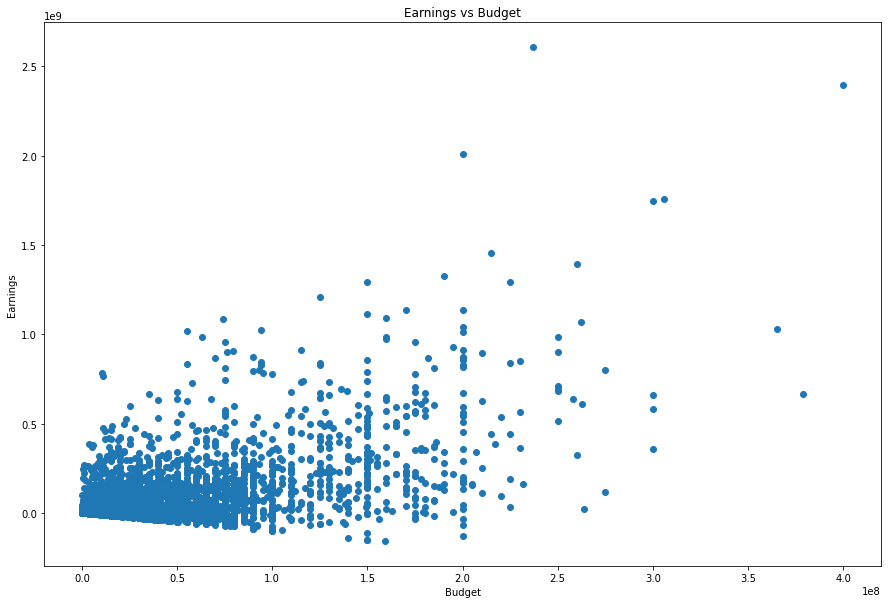

In [37]:
fig, ax = plt.subplots()
ax.scatter(x=production_budget, y= earnings )

#fig.pyplot.set_size(10,10)
#ax.ticklabel_format(useOffset=False, style='plain')
fig.set_size_inches(15,10)
ax.set_xlabel('Budget')
ax.set_ylabel('Earnings')
ax.set_title('Earnings vs Budget')